Functions

In [2]:
import pandas as pd
import numpy as np
import umap
import numpy as np
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import umap.plot

# Step 1: Recreate Previous Work

### PCA

In [ ]:
#I'll add previous code I've used for PCA (should be a quick step)

tSNE

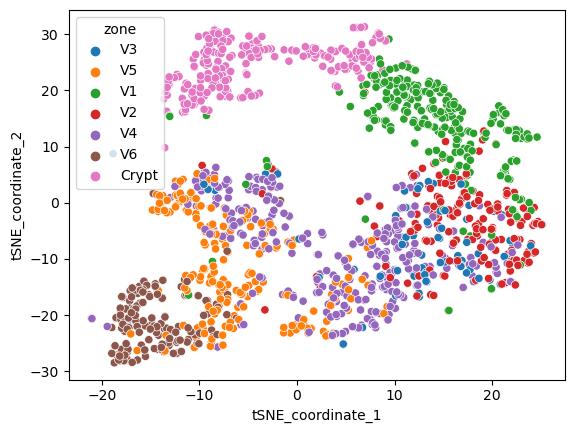

In [9]:
import seaborn as sns
tsne_df = pd.read_csv('./table_C_scRNAseq_tsne_coordinates_zones.tsv', sep='\t')
tsne_df


sns.scatterplot(data=tsne_df, x='tSNE_coordinate_1', y='tSNE_coordinate_2', hue='zone')

plt.show()
#needs more elegant plot, with "zone" column added as color hue
#What other filters could be intersting for this?? 

ParetoTI

# Step 2: Apply UMAP and compare to previous Results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


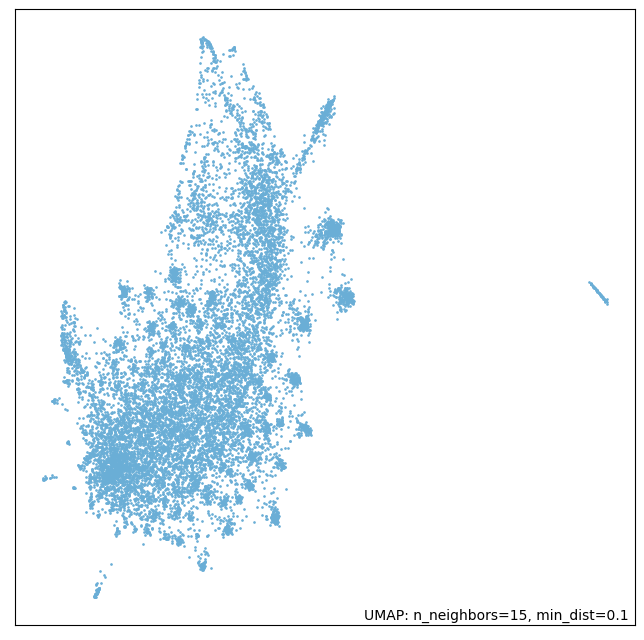

In [10]:
rnaseq = pd.read_csv("./table_B_scRNAseq_UMI_counts.tsv", sep='\t') #UMI is number of observed transcripts
data_df = rnaseq.drop('gene', axis=1)
data_df = data_df.astype(float)
data_df
rnaseq

# collect only the rows where expression exists for a gene
sums    = data_df.sum(axis=1)
expr_df = data_df[sums != 0]

#build model
reducer = umap.UMAP()
scaler  = sklearn.preprocessing.StandardScaler()
data    = scaler.fit_transform(expr_df)

embedding        = reducer.fit(data)
rnaseq_coord_df  = pd.DataFrame(embedding.embedding_, columns=['X','Y'])
embedding
#Need to add location data / other data to rnaseq dataframe and plot this on the UMAP projection Below

# what are the clusters? 

umap.plot.points(embedding)
plt.show()

# Step 3: (If time) Apply to a different dataset, apply ParetoTI to UMAP results 

# Extra
Table D: zonation data

In [59]:
#zonation matrix 
zm = pd.read_csv("C:/Users/plfab/Documents/Mines/BIO520/Code_spatial_reconstruction_enterocytes/table_D_zonation_reconstruction.tsv", sep='\t')

#gets just the data columns
data_df = zm.filter(regex='V._mean')
data_df = data_df.astype(float)

#build model
reducer = umap.UMAP()
scaler  = sklearn.preprocessing.StandardScaler()
data    = scaler.fit_transform(data_df)

embedding = reducer.fit(data)
coord_df  = pd.DataFrame(embedding.embedding_, columns=['X','Y'])

,V1_mean,V2_mean,V3_mean,V4_mean,V5_mean,V6_mean
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
27993,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000
27994,0.000060,0.000060,0.000037,0.000057,0.000102,0.000075
27995,0.000045,0.000042,0.000041,0.000036,0.000040,0.000032
27996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


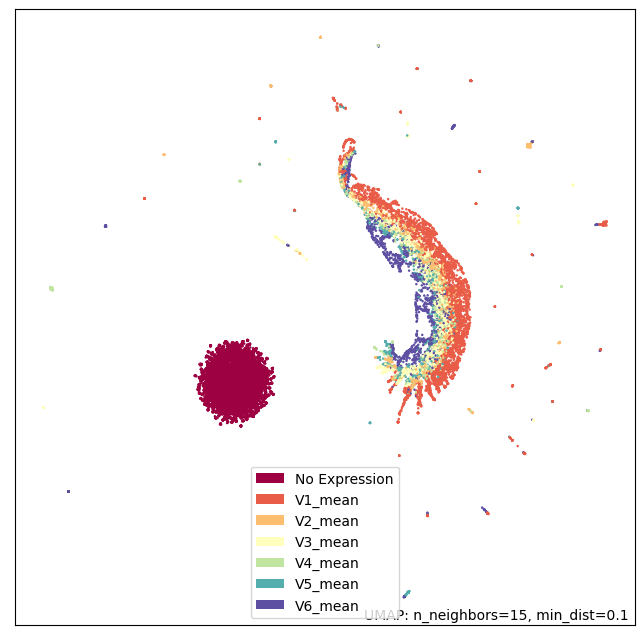

In [86]:
data_df['total'] = data_df[[f for f in data_df.columns if 'V' in f]].sum(axis=1)
data_df.loc[data_df['total'] <= 10e-10, 'highest'] = 'No Expression'
data_df.loc[data_df['total'] >= 10e-10, 'highest'] = data_df[[f for f in data_df.columns if 'V' in f]].idxmax(axis=1)

umap.plot.points(embedding, labels=data_df['highest'])
plt.show()